<a href="https://colab.research.google.com/github/gabrieldepaiva/Projetos_Financas-Python/blob/main/Analise_Carteira_de_Acoes_Pessoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [6]:
#@title
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
from google.colab.data_table import DataTable
print('Pacotes Necessários Carregados com Sucesso')

Pacotes Necessários Carregados com Sucesso


## Escolha dos ativos que compõem a carteira

In [5]:
#@title
print('Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores')
DataBase = pd.read_csv('https://raw.githubusercontent.com/gabrieldepaiva/Projetos_Financas-Python/main/Tickers.csv',sep=';')
DataTable(DataBase,include_index=False,num_rows_per_page=5)

Pesquisa rápida de cada código das ações das empresas listadas na bolsa de valores


,Empresa,Ticker
0,AES Tiete Energia SA Brazilian Units,TIET11.SA
1,AF Invest FII - Recebiveis Imobiliarios,AFCR11.SA
2,Aliansce Sonae Shopping Centers SA,ALSO3.SA
3,Alianza Trust Renda Imobiliaria FII,ALZR11.SA
4,Alpargatas SA,ALPA3.SA
...,...,...
398,XP Log Fundo de Investimento Imobiliario-FII,XPLG11.SA
399,XP Malls Fundo de Investimento Imobiliario,XPML11.SA
400,XP Properties FII - FII,XPPR11.SA
401,Xp Selection Fundo de Fundos Inv Imob Fii,XPSF11.SA


In [7]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:')
print('')

# Código Base para incluir os ativos na carteira
opcao = 1
carteira = []

carteira.append(input('Digite o nome do ativo. - '))
opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))

while True:
  if opcao == 1:
    carteira.append(input('Digite o nome do ativo. - '))
    opcao = int(input('Deseja digitar outro ativo? [1] Sim / [2] Não - '))
  elif opcao != 1 and opcao != 2:
    opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
  else:
    break

print('')
print(f'Sua carteira é composta pelos seguintes ativos: {carteira}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: PETR4.SA:

Digite o nome do ativo. - PETR4.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - TAEE11.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 1
Digite o nome do ativo. - BEES3.SA
Deseja digitar outro ativo? [1] Sim / [2] Não - 2

Sua carteira é composta pelos seguintes ativos: ['PETR4.SA', 'TAEE11.SA', 'BEES3.SA']


## Atribuindo os Pesos para esses Ativos

In [8]:
#@title
lista = [carteira]

pesos = []

try:
  for loc, ativo in enumerate(carteira):
    pesos.append(float(input(f'Escreva o peso do ativo {carteira[loc]} (somente o número) - '))/100)
except:
  print('')
  print('\033[31mO valor digitado resultou em um erro.\033[m')
  print('Favor executar esta célula novamente!')

# pode ser que não precise dessa parte do código
else:
  if sum(pesos) != 1:
    print('')
    print(f'\033[31mA soma dos pesos resultou em {sum(pesos)*100}%, a soma deve ser 100%!\033[31m')
    print('Favor executar esta célula novamente!')

Escreva o peso do ativo PETR4.SA (somente o número) - 15
Escreva o peso do ativo TAEE11.SA (somente o número) - 30
Escreva o peso do ativo BEES3.SA (somente o número) - 55


## Importação da base de dados com as cotações diárias do Yahoo Finance

In [9]:
#@title
inicio = input('A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> ')

BaseDados = pd.DataFrame()

for acao in carteira:
  BaseDados[acao] = data.DataReader(acao, data_source = 'yahoo',start = inicio)['Adj Close']

print('')
print('Importação dos dados realizada com sucesso!')

A partir de qual data? Colocar em formato americano. Ex: "ano"-"mês"-"dia" -->> 2020-12-01

Importação dos dados realizada com sucesso!


##### Resultado da tabela que foi gerada de forma parcial

In [10]:
#@title
# Resultado da tabela que foi gerada parcialmente
BaseDados.head()

,PETR4.SA,TAEE11.SA,BEES3.SA
Date,,,
2020-12-01,25.600000,32.935101,5.10
2020-12-02,25.910000,32.586739,5.06
2020-12-03,26.639999,33.124210,5.09
2020-12-04,27.410000,32.606644,5.15
2020-12-07,27.000000,33.472572,5.18


## Inclusão da coluna com o retorno diário da carteira 

In [11]:
#@title
# Retorno acumulado de cada ação

retorno_acumulado = ((BaseDados/BaseDados.iloc[0])-1)*100

##### Tabela gerada com os resultados consolidados

In [12]:
#@title
w = np.array(pesos)

ValorTotal = (retorno_acumulado * w)
ValorTotal['Retorno'] = ValorTotal.sum(axis=1)
ValorTotal.tail()

,PETR4.SA,TAEE11.SA,BEES3.SA,Retorno
Date,,,,
2020-12-22,0.984375,0.022680,1.186276,2.193331
2020-12-23,1.376953,0.013572,1.401962,2.792488
2020-12-28,1.511719,0.632973,1.725494,3.870185
2020-12-29,1.564453,0.578318,4.313727,6.456498
2020-12-30,1.605469,0.423470,3.774509,5.803448


## Escolha dos Benchmarks

In [15]:
#@title
print('Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC')
print('')

benchmarks = []

q = 's'

q = input('Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - ')
if q == 's':

  # inclusão dos benchmarks
  escolha = 1

  benchmarks.append(input('Digite o código do benchmark. - '))
  escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))

  while True:
    if escolha == 1:
      benchmarks.append(input('Digite o nome do benchmark. - '))
      escolha = int(input('Deseja adicionar outro? [1] Sim / [2] Não - '))
    elif opcao != 1 and opcao != 2:
      opcao = int(input('Escolha entre [1] Sim / [2] Não - '))
    else:
      break

  print('')
  print(f'Os seguintes benchmarks foram incluídos : {benchmarks}')

Usar a nomenclatura utilizada no Yahoo Finance. Ex: Para o Ibovespa, ^BVSP; para os fundos imobiliários, IFIX.SA e para o S&P 500 é ^GSPC

Deseja incluir algum benchmark? Se sim, digite "s", caso contrário tecle "Enter" - s
Digite o código do benchmark. - ^BVSP
Deseja adicionar outro? [1] Sim / [2] Não - 2

Os seguintes benchmarks foram incluídos : ['^BVSP']


##### Importação dos dados dos benchmarks que foram escolhidos

In [16]:
#@title
#Os dados referentes aos benchmarks escolhidos serão importados para posterior análise

BaseDados2 = pd.DataFrame()

for indice in benchmarks:
  BaseDados2[indice] = data.DataReader(indice, data_source = 'yahoo',start = inicio)['Adj Close']

bmk_var_acum = ((BaseDados2/BaseDados2.iloc[0])-1)*100

print('Importação dos dados realizada com sucesso!')

Importação dos dados realizada com sucesso!


### Criação da Tabela Carteira X Benchmarks

In [17]:
#@title
# Criação da tabela com o retorno acumulado da carteira e dos benchmarks selecionados

tabela_final = pd.DataFrame()

tabela_final['Sua Carteira'] = ValorTotal['Retorno']

for i in benchmarks:
  tabela_final[i] = bmk_var_acum[i]

##### Resultado da tabela criada

In [18]:
#@title
tabela_final.head()

,Sua Carteira,^BVSP
Date,,
2020-12-01,0.000000,0.000000
2020-12-02,-0.567049,0.430233
2020-12-03,0.673791,1.422733
2020-12-04,1.300579,2.108052
2020-12-07,2.172630,2.056855


## Visualizações e Análises dos Dados Importados e Normalizados

##### Visualização dos ativos que compõem a carteira

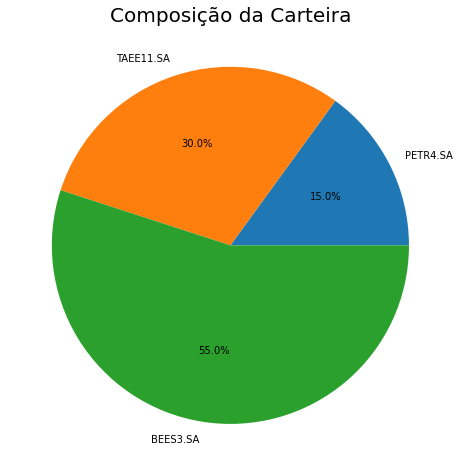

In [19]:
#@title
# Visualização da Representatividade na carteira
listafinal = []

for numero in pesos:
  listafinal.append(numero * 200)

listafinal

x_list = listafinal
labels_list = carteira
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(x_list,autopct='%1.1f%%',labels=labels_list)
plt.title('Composição da Carteira',size=20)
print('')

##### Visualização das variações da carteira e benchmarks acumulados

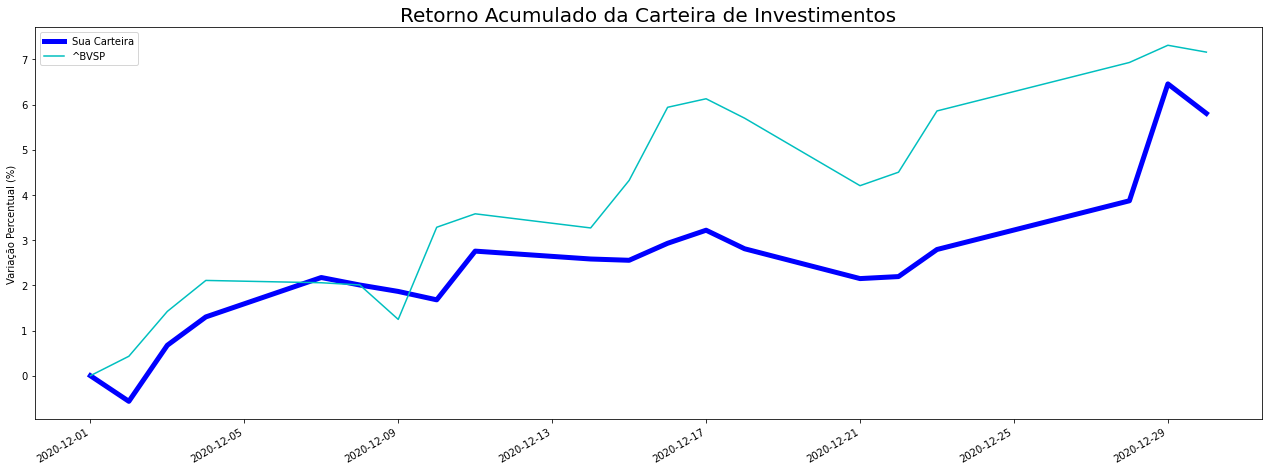

In [20]:
#@title
# Visualização das variações da carteira e benchmarks acumulados
cores = ['c','#368B8B','#276666','#276666','#0FA7A7']

tabela_final['Sua Carteira'].plot(color='b',LineWidth=5,figsize=(22,8))
for loc,j in enumerate(benchmarks):
  tabela_final[j].plot(color=cores[loc])
plt.legend()
plt.title ('Retorno Acumulado da Carteira de Investimentos',size=20)
plt.xlabel('')
plt.ylabel('Variação Percentual (%)')
print('')

##### Lista de Resultados da carteira analisada

In [21]:
#@title
BaseDados['Soma'] = BaseDados.sum(axis=1)

ret_cart = BaseDados['Soma'].pct_change().mean()*100
risco_cart = BaseDados['Soma'].pct_change().std()*100
linhas = BaseDados['Soma'].pct_change().count()
ret_acum_cart = tabela_final['Sua Carteira'].iloc[linhas]

print(f'Variação diária média da carteira: {round(ret_cart,2)}% a.p.')
print(f'Retorno acumulado da carteira: {round(ret_acum_cart,2)}% a.p.')
print(f'Risco da carteira: {round(risco_cart,2)}% a.p')
if q == 's':
  if '^BVSP' in tabela_final:
    ret_acum_ibov = tabela_final['^BVSP'].iloc[linhas]
    dci = round(((ret_acum_cart/ret_acum_ibov)-1)*100,2)
    print(f'Desempenho em relação ao Ibovespa: {dci}%.')
  else:
    print('')

Variação diária média da carteira: 0.29% a.p.
Retorno acumulado da carteira: 5.8% a.p.
Risco da carteira: 0.89% a.p
Desempenho em relação ao Ibovespa: -18.94%.
